# ENVIRONMENT

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# suppress scientific notation in Pandas
pd.options.display.float_format = "{:,.2f}".format
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
pd.set_option("precision", 3)
pd.set_option("display.max_colwidth", None)

plt.rcParams["figure.figsize"] = [12, 10]
plt.rcParams["figure.dpi"] = 150

sns.set()
sns.set_context("notebook", rc={"lines.linewidth": 2.5})
sns.set_style("whitegrid")

import warnings

warnings.filterwarnings("ignore")

RANDOM_STATE = 1

original_df = pd.read_csv("./src/churn/churn_clean.csv")


## PCA Examples

In [2]:
model = PCA()
model.fit(samples)
transformed = model.transform(samples)

NameError: name 'samples' is not defined

In [ ]:
# Plotting the variances of PCA features
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(samples)
features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

In [ ]:
# Dimension reduction of iris dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(samples)
transformed = pca.transform(samples)
print(transformed.shape)

import matplotlib.pyplot as plt
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys, c=species)
plt.show()

In [ ]:
# Calculating the principal components
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std_df = scaler.fit_transform(df)
from sklearn.decomposition import PCA
pca = PCA()
print(pca.fit_transform(std_df))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(std_df)
print(pca.explained_variance_ratio_)

In [ ]:
pca = PCA()
pca.fit(ansur_std_df)
print(pca.explained_variance_ratio_.cumsum())

In [ ]:
print(pca.components_)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
pipe = Pipeline([
('scaler', StandardScaler()),
('reducer', PCA())])
pc = pipe.fit_transform(ansur_df)
print(pc[:,:2])

In [ ]:
# Checking the effect of categorical features
ansur_categories['PC 1'] = pc[:,0]
ansur_categories['PC 2'] = pc[:,1]
sns.scatterplot(data=ansur_categories,
x='PC 1', y='PC 2',
hue='Height_class', alpha=0.4)

sns.scatterplot(data=ansur_categories,
x='PC 1', y='PC 2',
hue='Gender', alpha=0.4)

In [ ]:
pipe = Pipeline([
('scaler', StandardScaler()),
('reducer', PCA(n_components=3)),
('classifier', RandomForestClassifier())])
print(pipe['reducer'])

In [ ]:
pipe.fit(X_train, y_train)
pipe['reducer'].explained_variance_ratio_

pipe['reducer'].explained_variance_ratio_.sum()

print(pipe.score(X_test, y_test))

In [ ]:
pipe = Pipeline([
('scaler', StandardScaler()),
('reducer', PCA(n_components=0.9))])
# Fit the pipe to the data
pipe.fit(poke_df)
print(len(pipe['reducer'].components_))

pipe.fit(poke_df)
var = pipe['reducer'].explained_variance_ratio_
plt.plot(var)
plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# split into training and testing sets
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3,
    stratify=y, random_state=0
)
# standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
"""
Using the numpy.cov function, we computed the covariance matrix of the standardized training dataset. Using the linalg.eig function, we performed the eigendecomposition, which yielded a vector (eigen_vals) consisting of 13 eigenvalues and the corresponding eigenvectors stored as columns in a 13 x 13-dimensional matrix (eigen_vecs).
"""
import numpy as np

cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [ ]:
import matplotlib.pyplot as plt

# calculate cumulative sum of explained variances
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.bar(range(1,14), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [ ]:
"""
We will sort the eigenpairs by descending order of the eigenvalues, construct a projection matrix from the selected eigenvectors, and use the projection matrix to transform the data onto the lower-dimensional subspace.

We start by sorting the eigenpairs by decreasing order of the eigenvalues:
"""


# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [ ]:
"""
Next, we collect the two eigenvectors that correspond to the two largest eigenvalues, to capture about 60% of the variance in this dataset. Note that we only chose two eigenvectors for the purpose of illustration, since we are going to plot the data via a two-dimensional scatter plot later in this subsection. In practice, the number of principal components has to be determined by a trade-off between computational efficiency and the performance of the classifier:
"""


w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

In [ ]:
"""
By executing the preceding code, we have created a 13 x 2-dimensional projection matrix W from the top two eigenvectors.

Using the projection matrix, we can now transform a sample x (represented as a 1 x 13-dimensional row vector) onto the PCA subspace (the principal components one and two) obtaining x′, now a two-dimensional sample vector consisting of two new features:
"""

X_train_std[0].dot(w)

# Similarly, we can transform the entire 124 x 13-dimensional training dataset onto the two principal components by calculating the matrix dot product:
X_train_pca = X_train_std.dot(w)


In [ ]:
"""
Lastly, let’s visualize the transformed Wine training set, now stored as an 124 x 2-dimensional matrix, in a two-dimensional scatterplot:


"""
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], 
                X_train_pca[y_train==l, 1], 
                c=c, label=l, marker=m) 
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# intialize pca and logistic regression model
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='auto', solver='liblinear')

# fit and transform data
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=[cmap(idx)],
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)# plot decision regions for training set


plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

In [ ]:
# plot decision regions for test set
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

In [ ]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

✅⭐👍👎

### Scenario 1

One of the most critical factors in customer relationship management that directly affects a company’s long-term profitability is understanding its customers. When a company can better understand its customer characteristics, it is better able to target products and marketing campaigns for customers, resulting in better profits for the company in the long term.

 

You are an analyst for a telecommunications company that wants to better understand the characteristics of its customers. You have been asked to use principal component analysis (PCA) to analyze customer data to identify the principal variables of your customers, ultimately allowing better business and strategic decision-making.

 

### Scenario 2

One of the most critical factors in patient relationship management that directly affects a hospital’s long-term cost-effectiveness is understanding its patients and the conditions leading to hospital admissions. When a hospital can better understand its patients’ characteristics, it is better able to target treatment to patients, resulting in more effective cost of care for the hospital in the long term.

 

You are an analyst for a hospital that wants to better understand the characteristics of its patients. You have been asked to use PCA to analyze patient data to identify the principal variables of your patients, ultimately allowing better business and strategic decision-making for the hospital.

# Part I: Research Question

## A.  Describe the purpose of this data mining report by doing the following:
> Gibson Telecom recently hired Lisa Murphy, a new VP of Growth for the Northeastern Region of the United States. Lisa has spent most of her career in the consumer discretionary sector and now wants to familiarize herself with Gibson Telecom's customer base and the customer personas. Lisa's first initiative is to increase year-over-year revenue in the Northeast. To accomplish this, she needs Gibson's data analyst team to report on the key attributes and characteristics that define Gibson's customers. 

### 1.  Propose one question relevant to a real-world organizational situation that you will answer by using principal component analysis (PCA).
*The submission proposes 1 question answered using PCA that is relevant to a real-world organizational situation.*


### 2.  Define one goal of the data analysis. Ensure that your goal is reasonable within the scope of the scenario and is represented in the available data.
*The submission defines 1 reasonable goal for data analysis that is within the scope of the scenario and is represented in the available data.*

One goal of this PCA 

- better understand the characteristics of Gibson Telecom's customers.
- identify the principal variables of your customers, ultimately allowing better business and strategic decision-making.

# Part II: Method Justification

## B.  Explain the reasons for using PCA by doing the following:
- "Resulting PCA features are not linearly correlated"
- "Represents same data, using less features"
- DATACAMP
    - Your dataset will:
        - be less complex
        - require less disk space
        - require less computation time
        - have lower chance of model overfitting
        - PCA removes correlation
- https://ourarchive.otago.ac.nz/bitstream/handle/10523/7534/OUCS-2002-12.pdf?sequence=1&isAllowed=y
    - PCA is a useful statistical technique that has found application in fields such as face recognition and image compression, and is a common technique for finding patterns in data of high dimension.
    
- https://analyticsindiamag.com/guide-to-image-reconstruction-using-principal-component-analysis/
    - PCA is an unsupervised learning method similar to clustering. It finds patterns without prior knowledge about whether the samples come from different treatment groups or essential differences. The objective is pursued by analysing principal components where we can perceive relationships that would otherwise remain hidden in higher dimensions. The representation processed must be such that the loss of information must be minimal after discarding the higher dimensions. The analysis of principal components can reveal relationships between variables and facilitate the dispersion of observations, highlighting possible groupings and detecting the variables that might be responsible for the dispersion. The goal of the methods is to reorient the data so that a multitude of original variables can be summarized with relatively few “factors” or “components” that capture the maximum possible information from the original variables.

- https://academic.oup.com/heapol/article/21/6/459/612115?login=false
    - Data in categorical form (such as religion) are not suitable for PCA, as the categories are converted into a quantitative scale which does not have any meaning.3 To avoid this, qualitative categorical variables should be re-coded into binary variables. In our example, similar variables with low frequencies were combined together: for example, ‘covered spring’ and ‘spring’ were combined for Ethiopia data; ‘toilet to open space’ and ‘toilet to river’ for Brazil data. Similar variables with relatively high frequencies were kept as separate variables (spring and river for Ethiopia data). We included all binary variables created from a categorical variable, including those that had low frequencies but were not similar enough to another variable to combine, in order to ensure all the data for each household were measured. We excluded durable assets that were initially binary with very low counts, for instance motorcycle in urban Ethiopia, which was owned by 0.1% of households.
    - Another data issue is that of missing values. Cortinovis et al. (1993) excluded households with at least one missing value from their analysis to develop socio-economic groups. Gwatkin et al. (2000) replaced missing values with the mean value for that variable. Exclusion of households based on missing socio-economic data could significantly lower sample sizes and the statistical power of study results, and may lead to bias towards higher SES households, as missing data may occur more frequently in lower social classes (Cortinovis et al. 1993). However, attributing mean scores for missing values reduces variation among households, and increases the potential for clumping and truncation. This is more pronounced with high numbers of missing values, though software packages such as STATA offer a range of methods for estimating missing values. In our example, the percentage of households with missing data was small (less than 1% in each site). We expect inclusion or exclusion of these households would have little impact on the distribution of SES, but for variables with missing values, we chose to impute the mean value of that variable.
    - The analysis of data on household characteristics and asset ownership is complicated by the fact that there are potentially a large number of variables which could be collected, some of which may yield similar information. Thus a natural approach is to use methods such as PCA to try and organize the data to reduce its dimensionality with as little loss of information as possible in the total variation these variables explain (Giri 2004).
    - PCA is not invariant to differences in the units of measurement among variables, therefore it is usual to standardize the variables in this instance (Bolch and Huang 1974). Standardization is the process of transforming variables so that the new set of scores has a mean equal to zero and standard deviation equal to one. The correlation matrix is a standardized version of the co-variance matrix.

### 1.  Explain how PCA analyzes the selected data set. Include expected outcomes.
- "Rows of transformed correspond to samples"
- "Columns of transformed are the "PCA features"
- "Row gives PCA feature values of corresponding sample"
- "Assumes the low variance features are "noise" and high variance features are informative"
- https://towardsdatascience.com/principal-component-analysis-for-dimensionality-reduction-115a3d157bad
    - Standardize the d-dimensional dataset.
    - Construct the covariance matrix.
    - Decompose the covariance matrix into its eigenvectors and eigenvalues.
    - Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors.
    - Select k eigenvectors which correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace (k ≤ d).
    - Construct a projection matrix W from the “top” k eigenvectors.
    - Transform the d-dimensional input dataset X using the projection matrix W to obtain the new k-dimensional feature subspace.
    - The eigenvectors of the covariance matrix represent the principal components (the directions of maximum variance), whereas the corresponding eigenvalues will define their magnitude.
- https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c
    - Finally, we make an assumption that more variability in a particular direction correlates with explaining the behavior of the dependent variable. Lots of variability usually indicates signal, whereas little variability usually indicates noise. Thus, the more variability there is in a particular direction is, theoretically, indicative of something important we want to detect.
    - Thus, PCA is a method that brings together:
        - A measure of how each variable is associated with one another. (Covariance matrix.)
        - The directions in which our data are dispersed. (Eigenvectors.)
        - The relative importance of these different directions. (Eigenvalues.)
        - PCA combines our predictors and allows us to drop the eigenvectors that are relatively unimportant.

- https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors
    In essence, an eigenvector v of a linear transformation T is a nonzero vector that, when T is applied to it, does not change direction. Applying T to the eigenvector only scales the eigenvector by the scalar value λ, called an eigenvalue. This condition can be written as the equation `T(v) = λv`


### 2.  Summarize one assumption of PCA.
- DATACAMP
- "More effcient storage and computation"
- "Remove less-informative "noise" features"
- "Rotates data samples to be aligned with axes"
- "Shifts data samples so they have mean 0"
- "No information is lost"
- https://towardsdatascience.com/principal-component-analysis-for-dimensionality-reduction-115a3d157bad
    - Note that the PCA directions are highly sensitive to data scaling, and we need to standardize the features prior to PCA if the features were measured on different scales and we want to assign equal importance to all features.
    
- https://builtin.com/data-science/step-step-explanation-principal-component-analysis
    - The aim of this step is to standardize the range of the continuous initial variables so that each one of them contributes equally to the analysis.
    - More specifically, the reason why it is critical to perform standardization prior to PCA, is that the latter is quite sensitive regarding the variances of the initial variables. That is, if there are large differences between the ranges of initial variables, those variables with larger ranges will dominate over those with small ranges (For example, a variable that ranges between 0 and 100 will dominate over a variable that ranges between 0 and 1), which will lead to biased results. So, transforming the data to comparable scales can prevent this problem.

In [25]:
original_df.columns.sort_values()

Index(['Age', 'Area', 'Bandwidth_GB_Year', 'CaseOrder', 'Children', 'Churn',
       'City', 'Contacts', 'Contract', 'County', 'Customer_id',
       'DeviceProtection', 'Email', 'Gender', 'Income', 'Interaction',
       'InternetService', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6',
       'Item7', 'Item8', 'Job', 'Lat', 'Lng', 'Marital', 'MonthlyCharge',
       'Multiple', 'OnlineBackup', 'OnlineSecurity', 'Outage_sec_perweek',
       'PaperlessBilling', 'PaymentMethod', 'Phone', 'Population',
       'Port_modem', 'State', 'StreamingMovies', 'StreamingTV', 'Tablet',
       'TechSupport', 'Techie', 'Tenure', 'TimeZone', 'UID',
       'Yearly_equip_failure', 'Zip'],
      dtype='object')

In [32]:
original_df[['Age', 'Area', 'Bandwidth_GB_Year', 'Children', 'Churn', 'Contacts', 'Contract',
       'DeviceProtection', 'Email', 'Gender', 'Income', 'Interaction',
       'InternetService', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6',
       'Item7', 'Item8', 'Job', 'Lat', 'Lng', 'Marital', 'MonthlyCharge',
       'Multiple', 'OnlineBackup', 'OnlineSecurity', 'Outage_sec_perweek',
       'PaperlessBilling', 'PaymentMethod', 'Phone', 'Population',
       'Port_modem', 'State', 'StreamingMovies', 'StreamingTV', 'Tablet',
       'TechSupport', 'Techie', 'Tenure', 'TimeZone',
       'Yearly_equip_failure']]

original_df.select_dtypes(['float64']).copy()

,Lat,Lng,Income,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,56.25,-133.38,"28,561.99",7.98,6.80,172.46,904.54
1,44.33,-84.24,"21,704.77",11.70,1.16,242.63,800.98
2,45.36,-123.25,"9,609.57",10.75,15.75,159.95,"2,054.71"
3,32.97,-117.25,"18,925.23",14.91,17.09,119.96,"2,164.58"
4,29.38,-95.81,"40,074.19",8.15,1.67,149.95,271.49
...,...,...,...,...,...,...,...
9995,43.43,-72.79,"55,723.74",9.42,68.20,159.98,"6,511.25"
9996,36.57,-87.42,"34,129.34",6.74,61.04,207.48,"5,695.95"
9997,35.52,-100.44,"45,983.43",6.59,47.42,169.97,"4,159.31"
9998,33.58,-85.13,"16,667.58",12.07,71.10,252.62,"6,468.46"


# Part III: Data Preparation

## C.  Perform data preparation for the chosen dataset by doing the following:

### 1.  Identify the continuous dataset variables that you will need in order to answer the PCA question proposed in part A1.
- If a Y variable exists and is part of your data, then separate your data into Y and X, as defined above — we’ll mostly be working with X.

### 2.  Standardize the continuous dataset variables identified in part C1. Include a copy of the cleaned dataset.
 

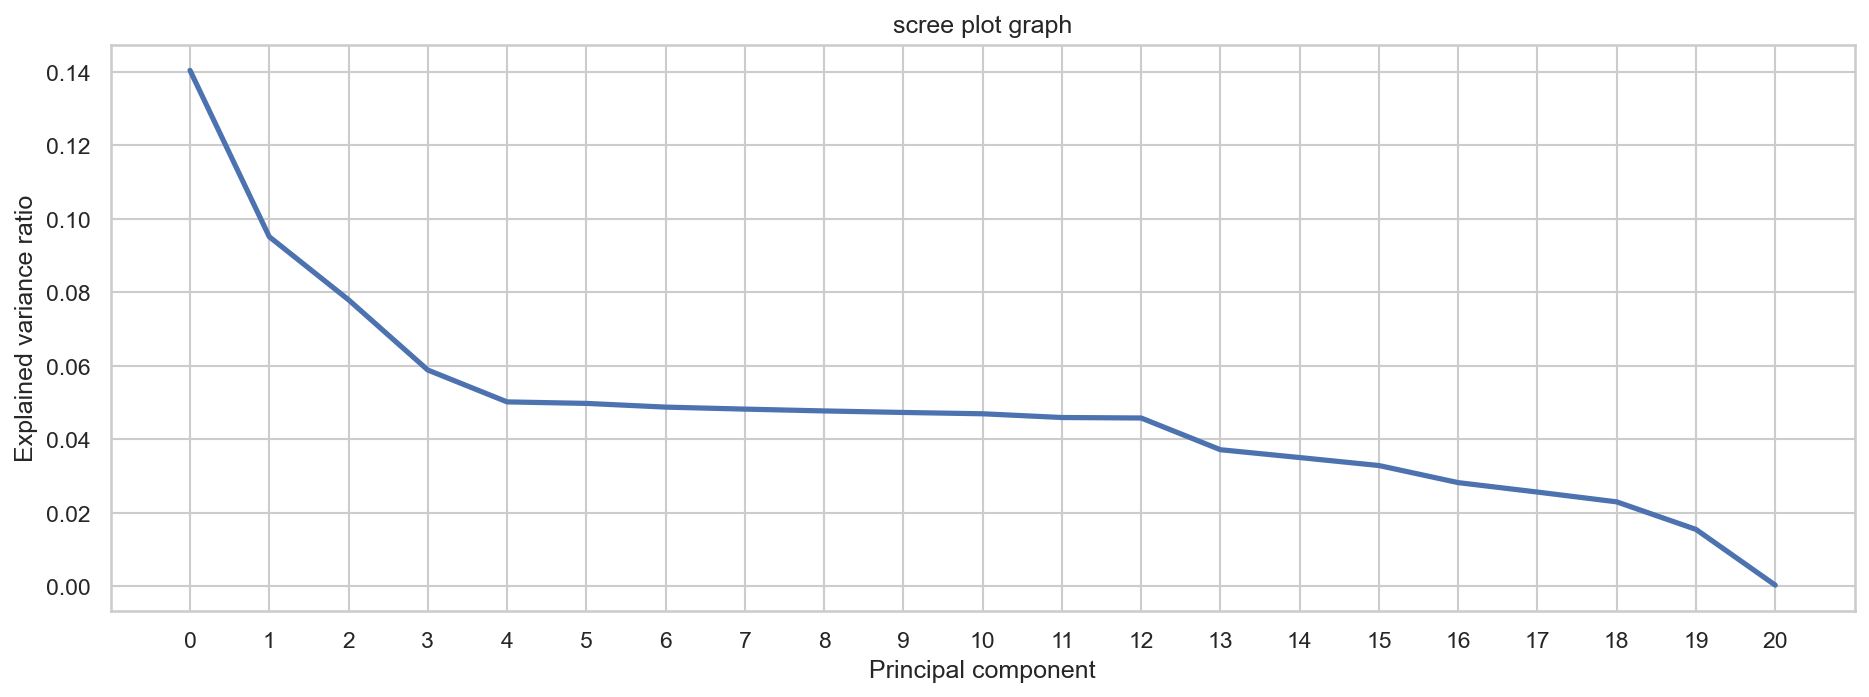

In [96]:
# prep_df = original_df.copy()
prep_df = original_df.select_dtypes(['float64', 'int64']).copy()
prep_df = prep_df.drop(['CaseOrder', 'Zip'], axis=1)

pipe = Pipeline([("scaler", StandardScaler()), ("pca", PCA())])



pipe.fit(prep_df)
pca = pipe.named_steps["pca"]
num_components = len(pca.components_)
var = pca.explained_variance_ratio_

fig, axs = plt.subplots(1, 1, figsize=(15, 5))
axs.set_title("scree plot graph")
sns.lineplot(data=var, ax=axs)

plt.xlabel("Principal component")
plt.ylabel("Explained variance ratio")
plt.xticks(np.arange(0, num_components, 1))

plt.show()


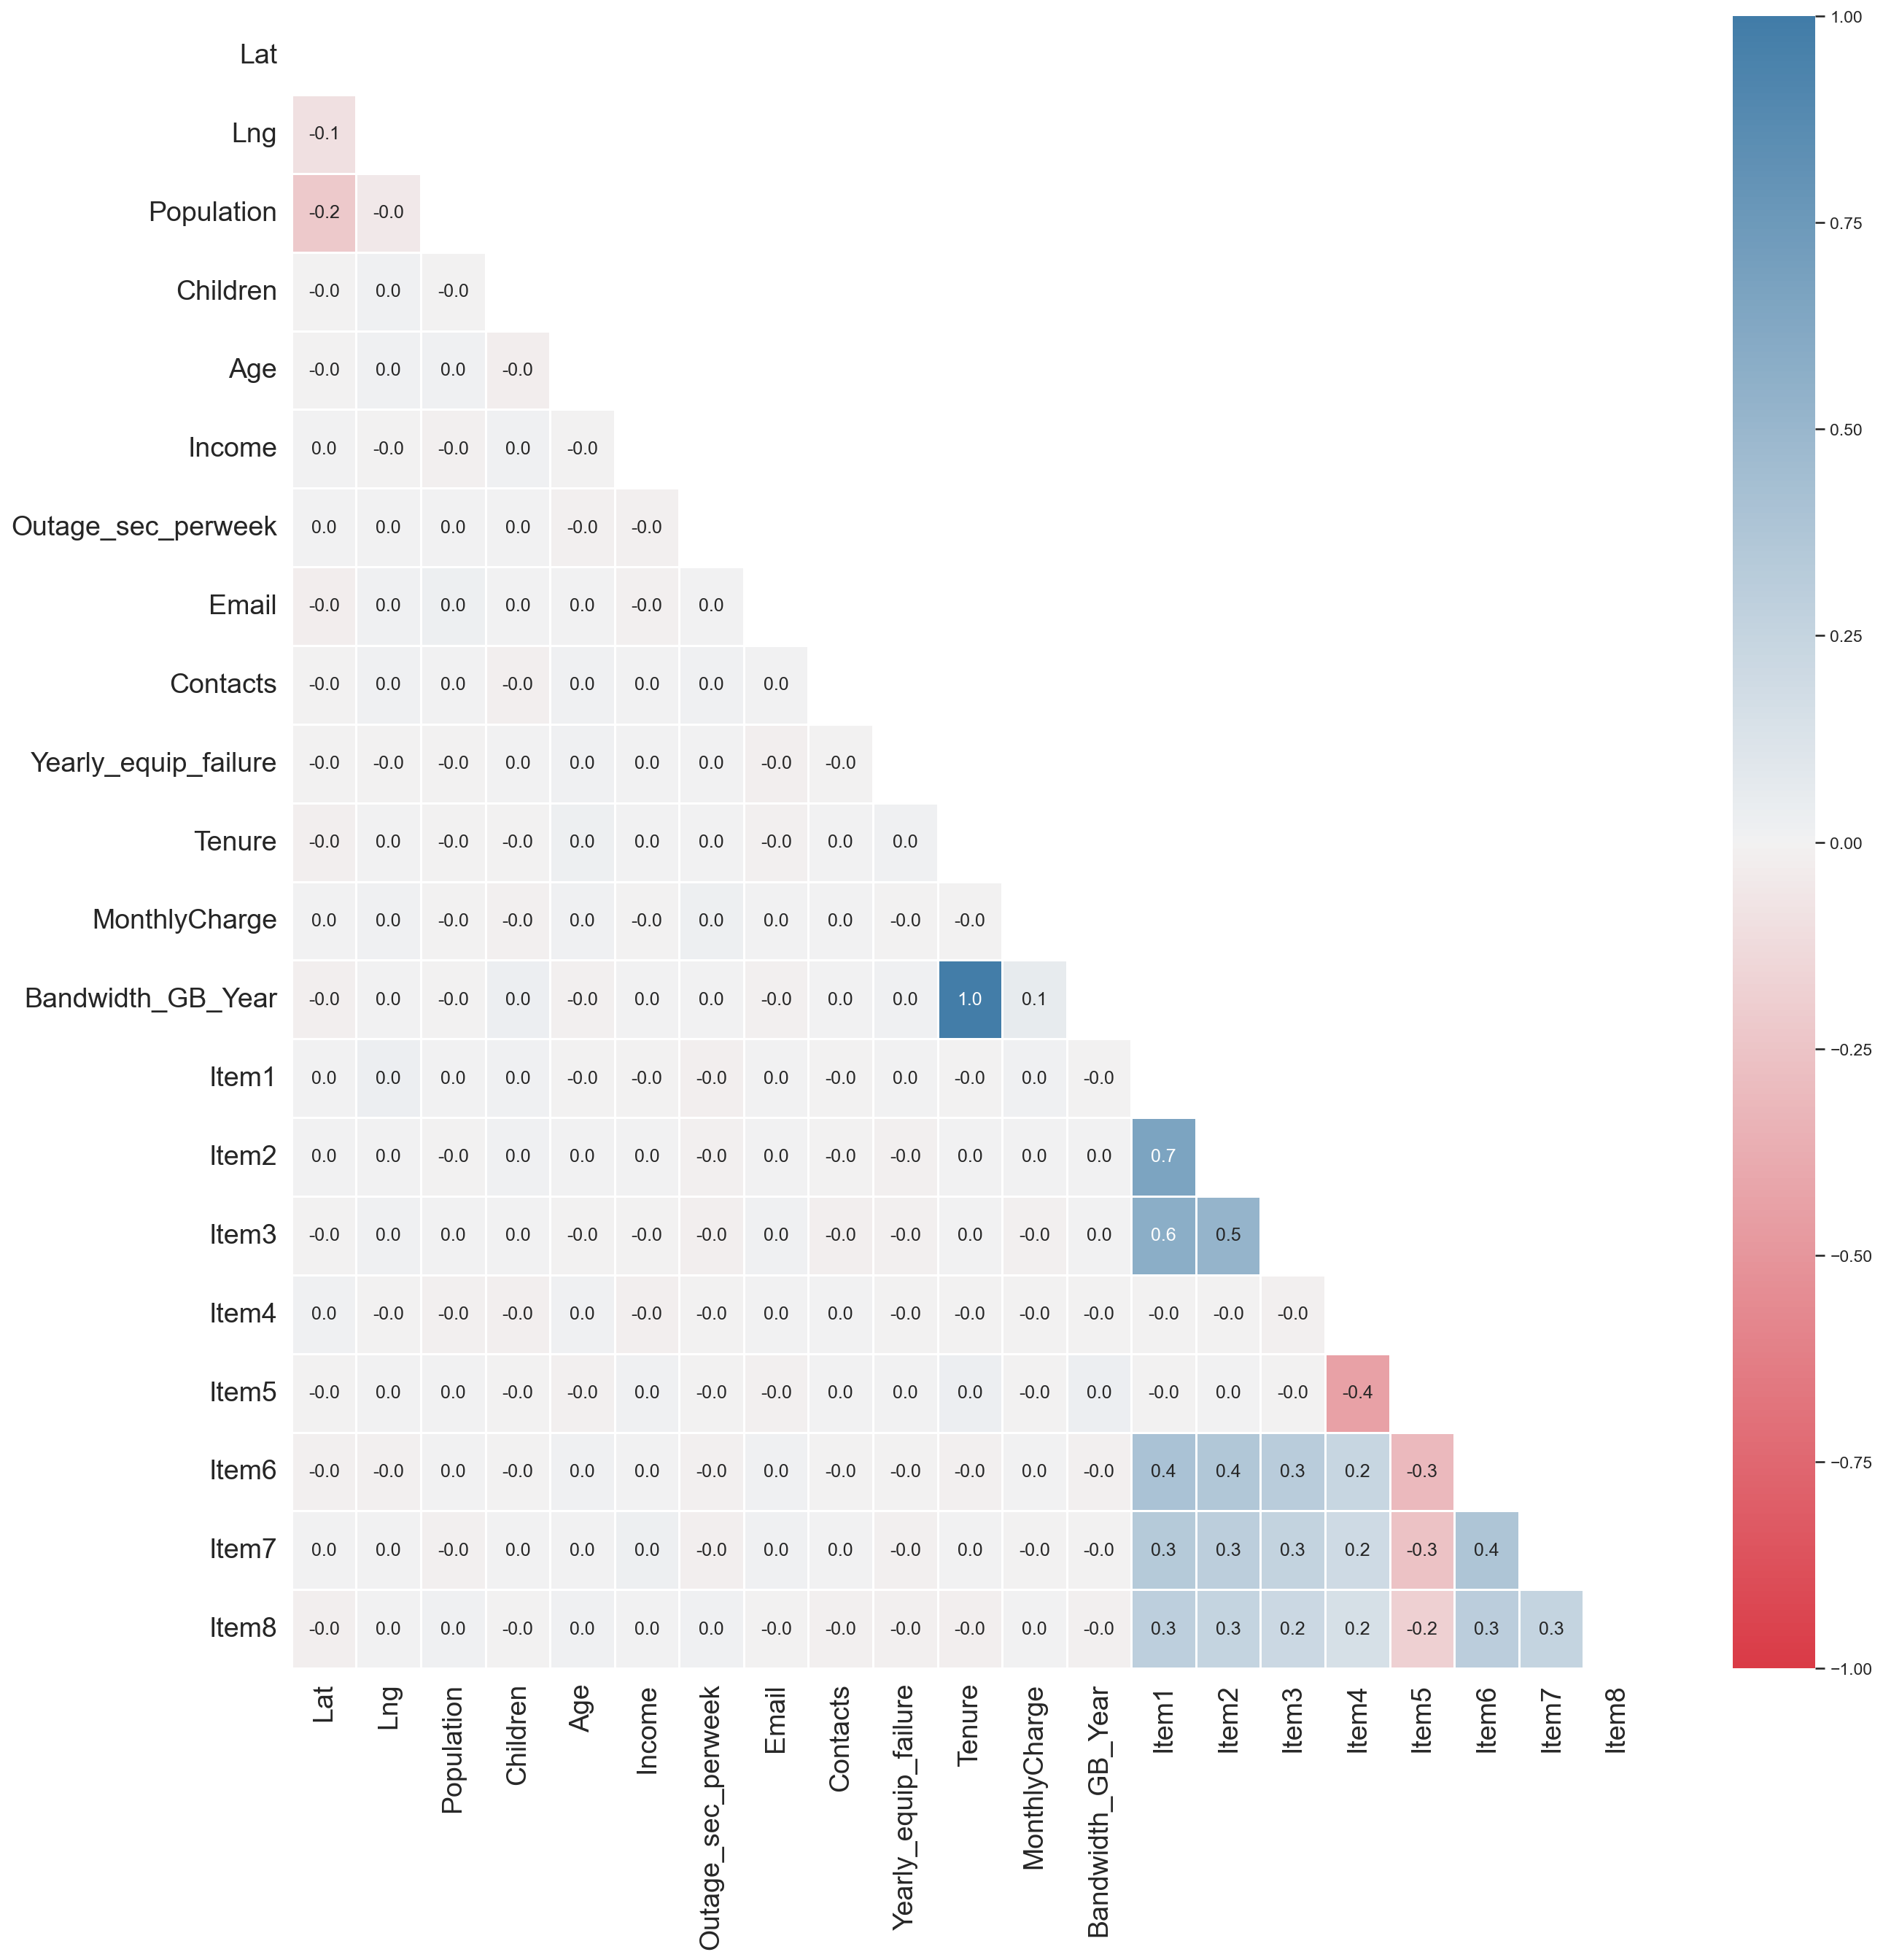

In [80]:
cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)
fig, ax = plt.subplots(figsize=(20, 20))
corr_df = prep_df.corr()

# mask part of the matrix
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True

hm = sns.heatmap(
    corr_df,
    center=0,
    cmap=cmap,
    annot=True,
    fmt=".1f",
    vmin=-1.0,
    vmax=1.0,
    mask=mask,
    linewidths=0.5,
    ax=ax,
)

_ = hm.set_xticklabels(hm.get_xmajorticklabels(), fontsize = 18)
_ = hm.set_yticklabels(hm.get_ymajorticklabels(), fontsize = 18)


In [91]:
prep_df.var().sort_values(ascending=False).head(15)


Income               795,235,301.98
Population           208,302,790.92
Bandwidth_GB_Year      4,775,513.59
MonthlyCharge              1,844.11
Tenure                       699.24
Age                          428.44
Lng                          229.71
Lat                           29.57
Email                          9.16
Outage_sec_perweek             8.86
Children                       4.61
Item1                          1.08
Item2                          1.07
Item6                          1.07
Item8                          1.06
dtype: float64

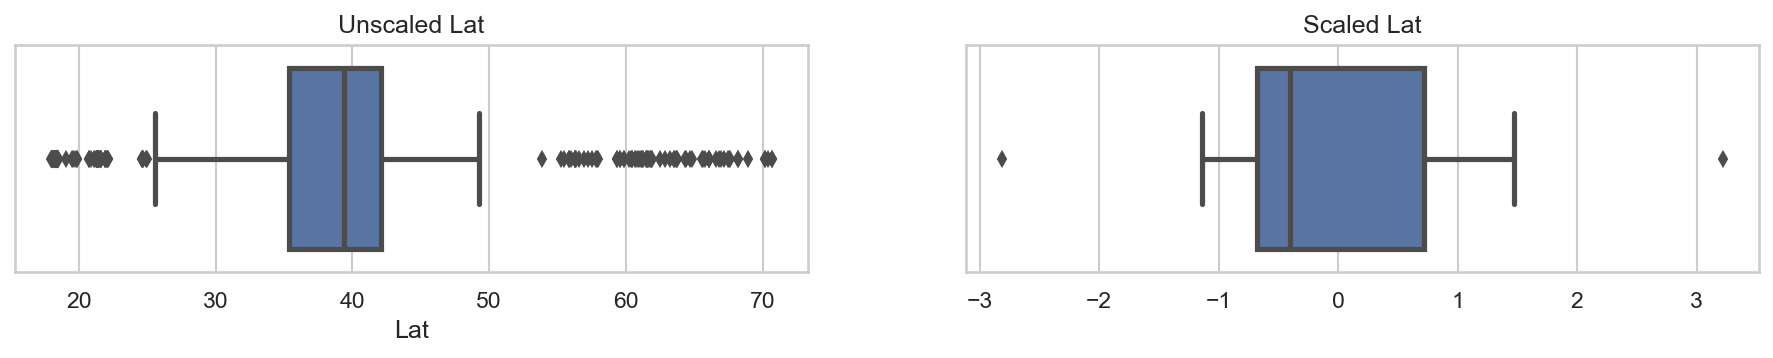

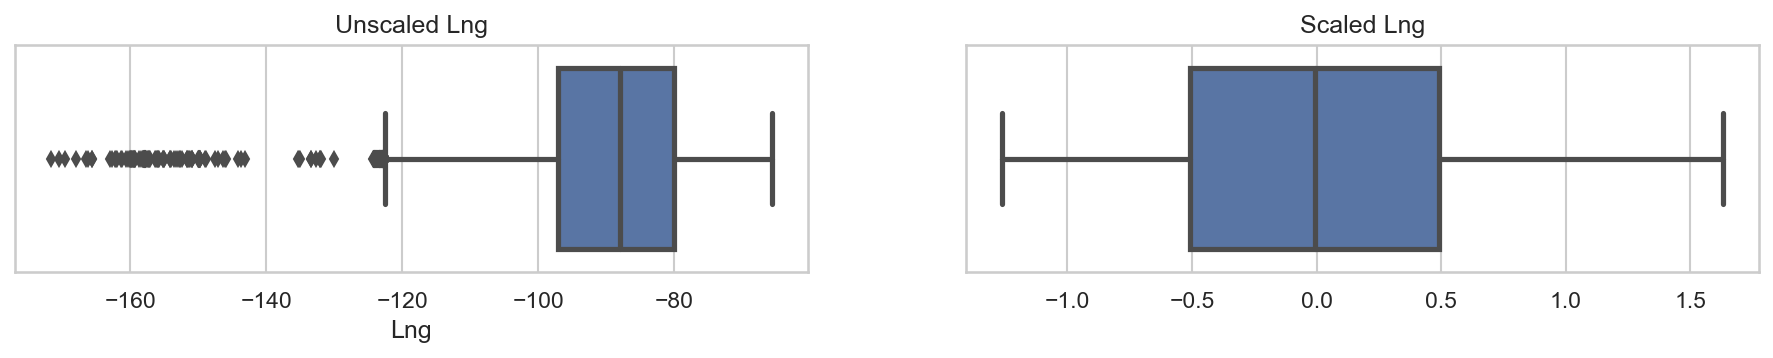

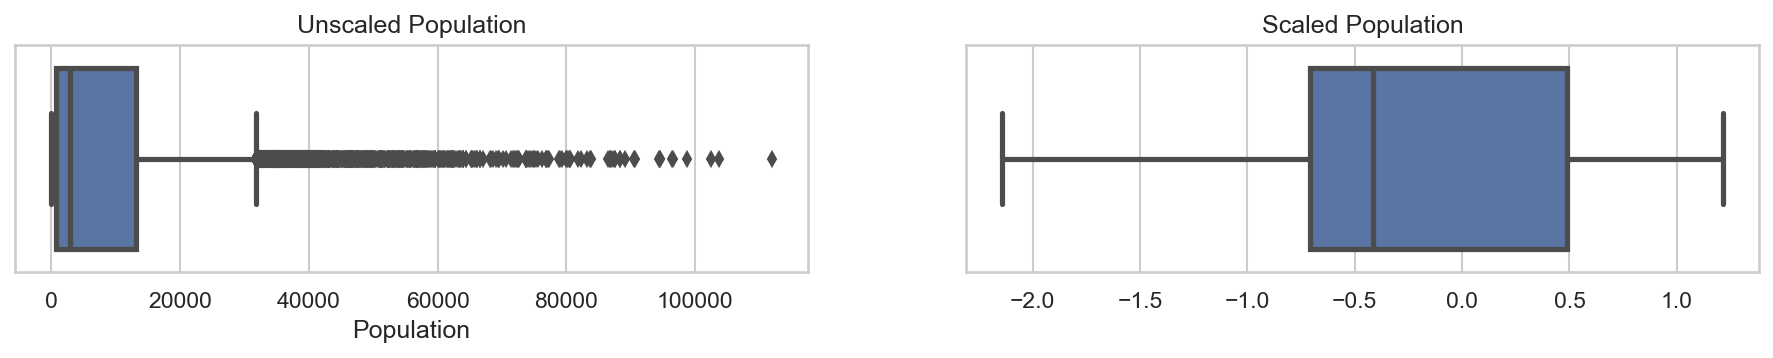

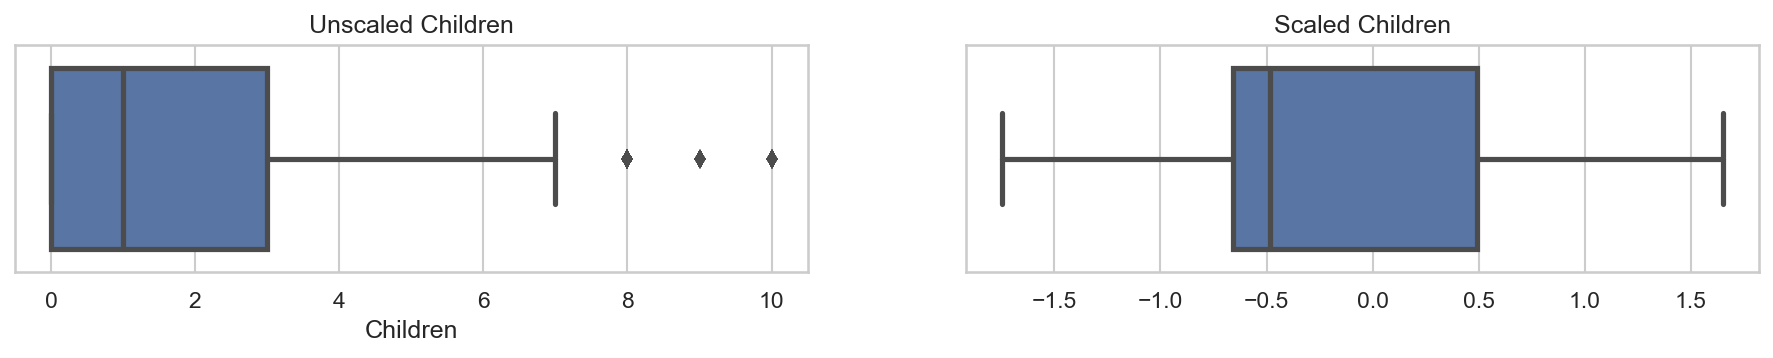

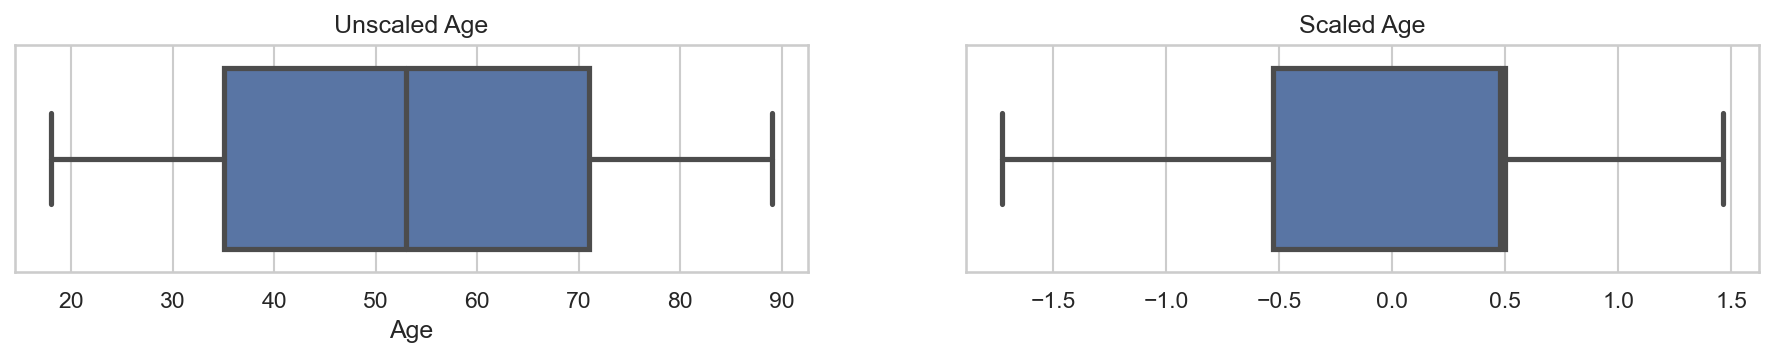

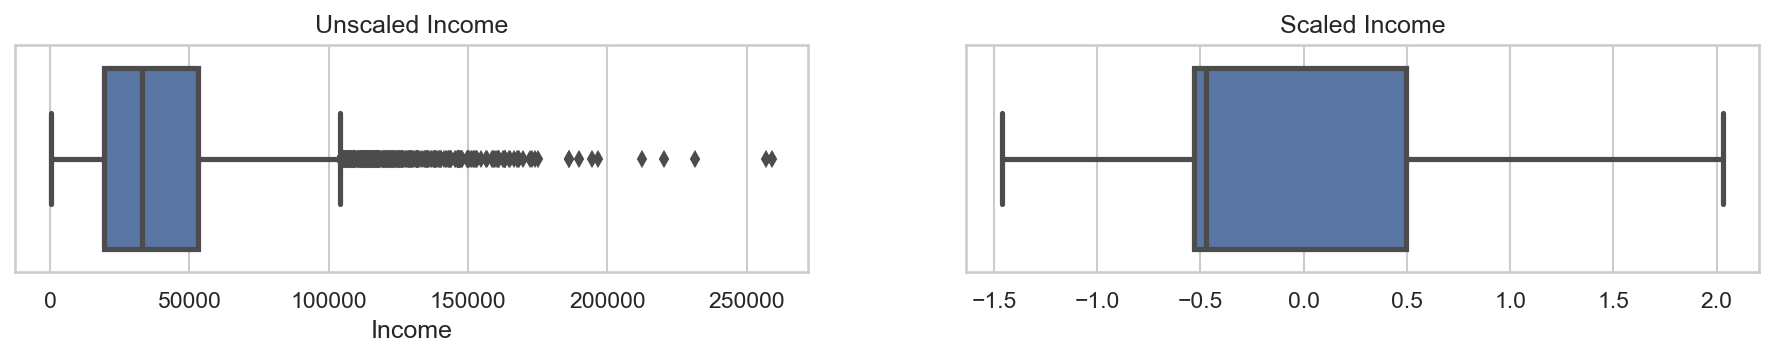

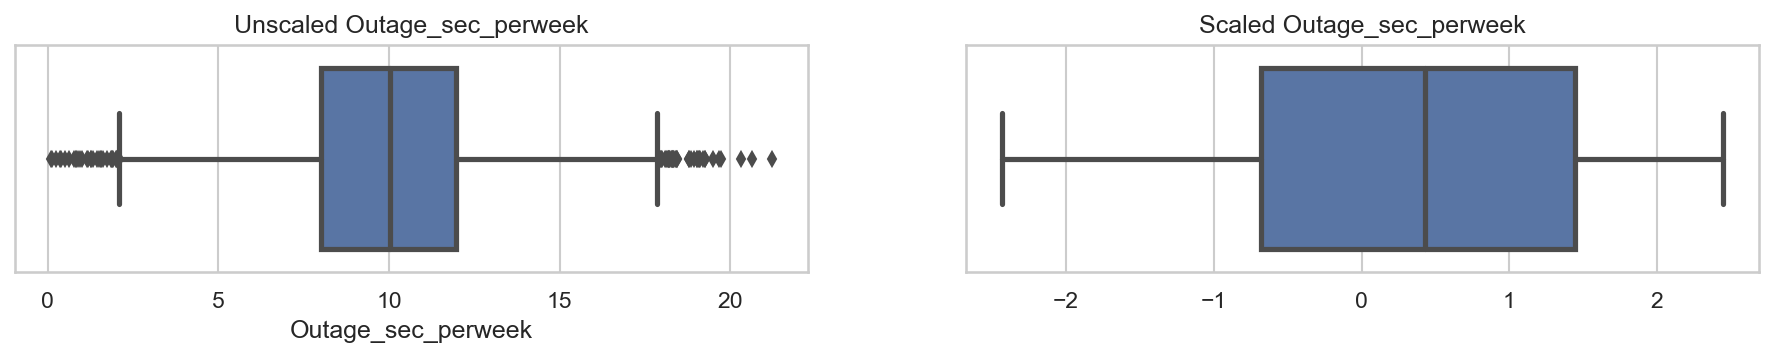

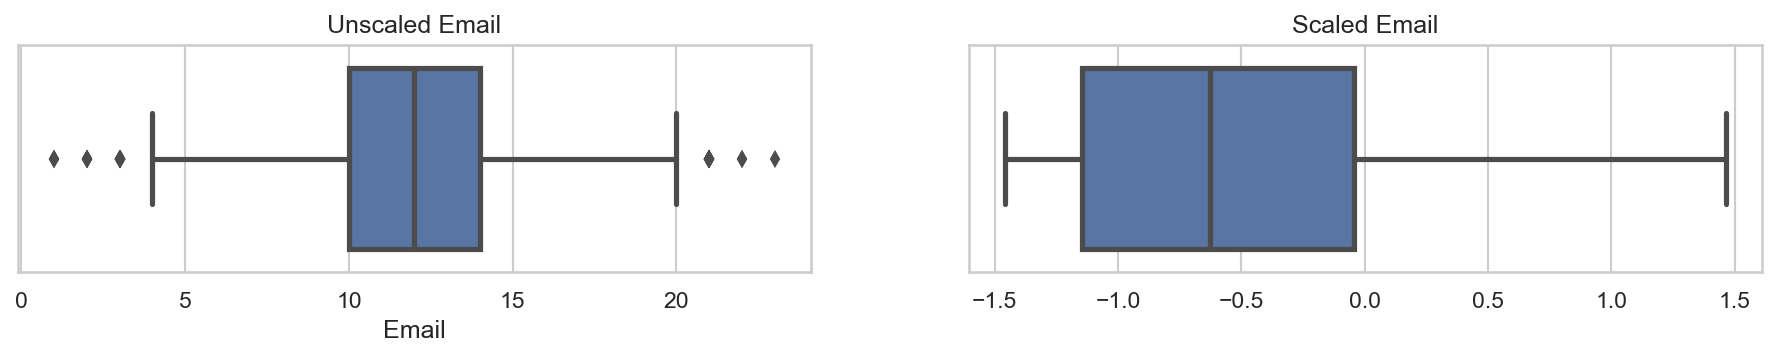

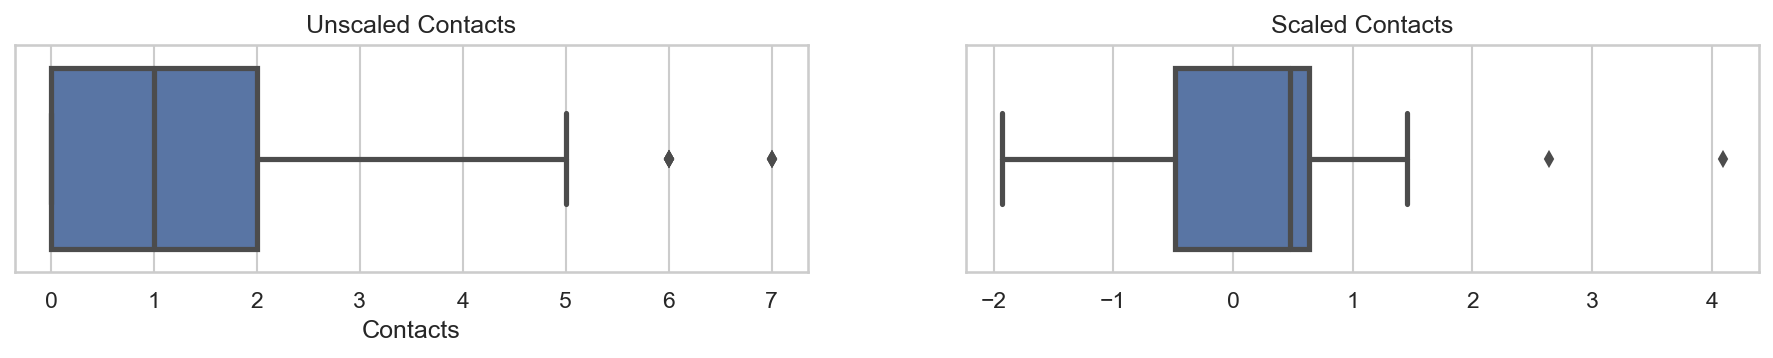

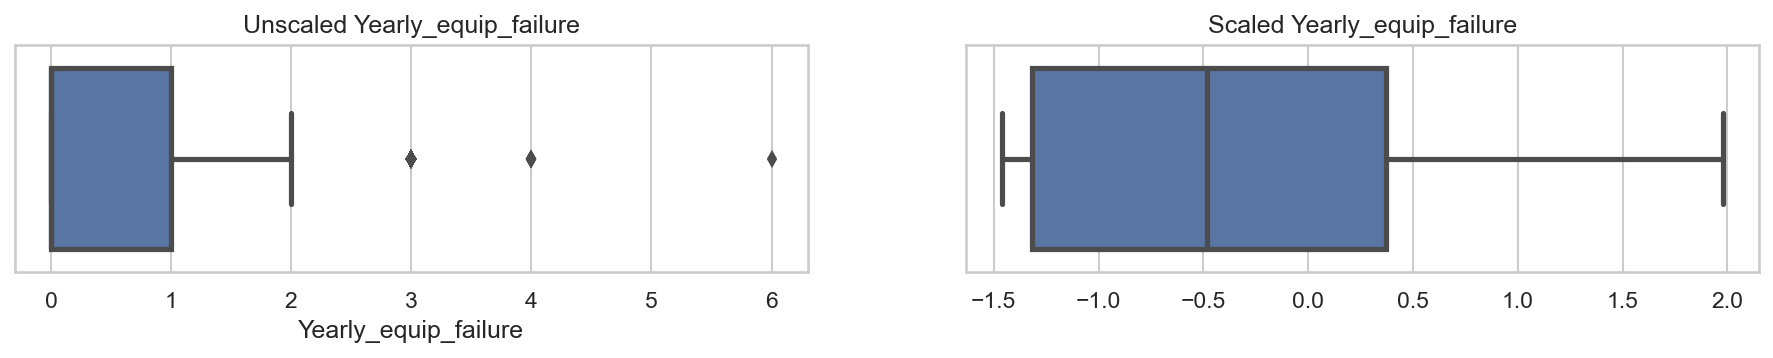

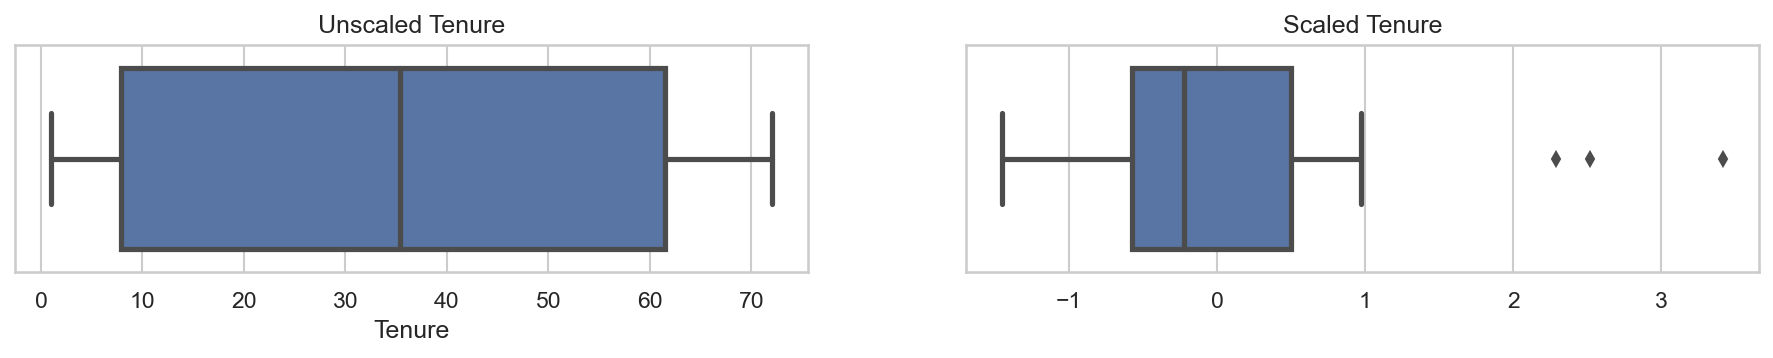

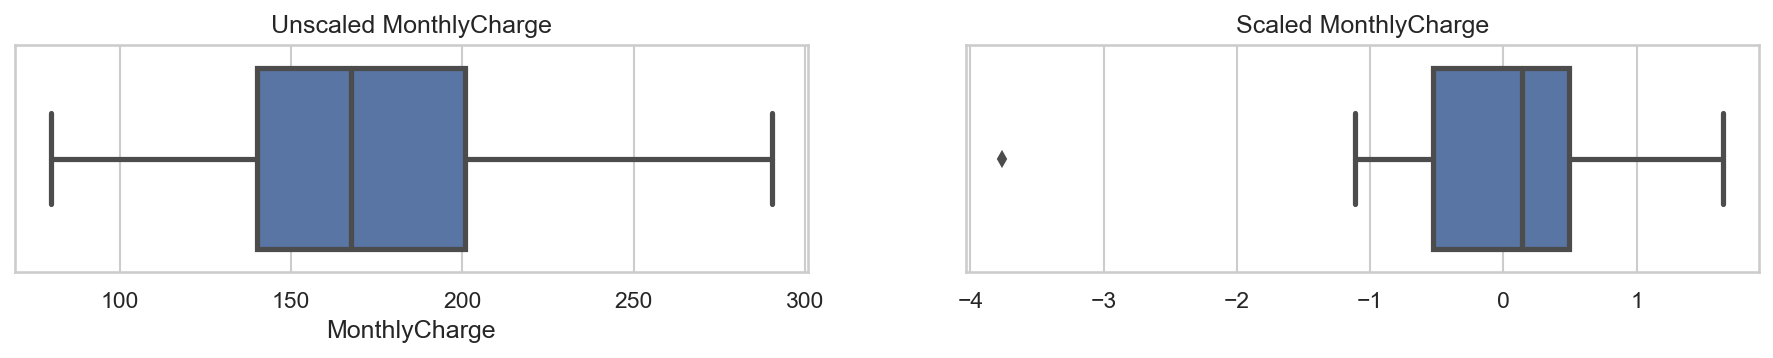

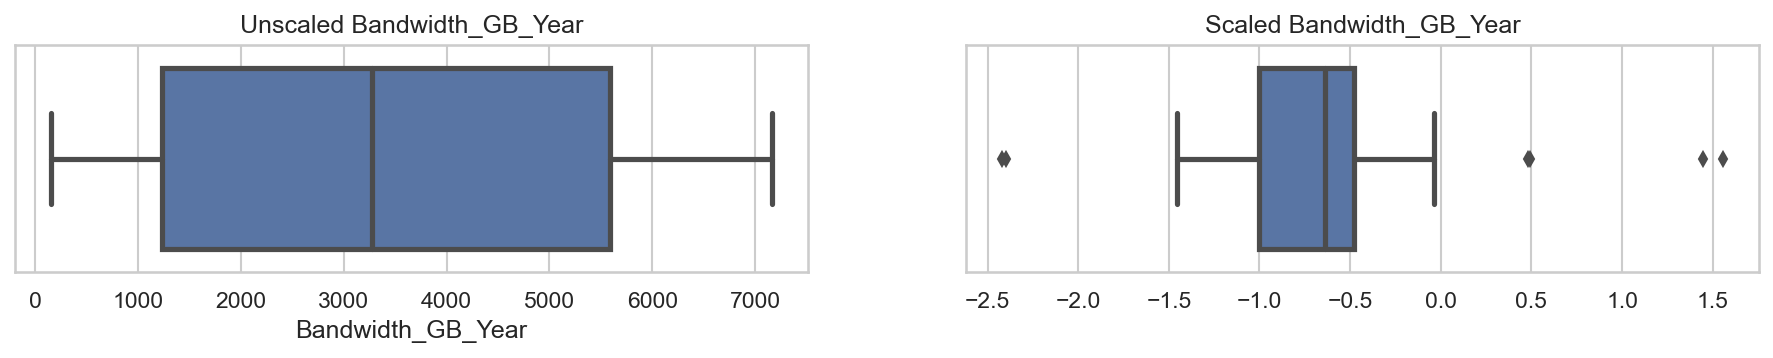

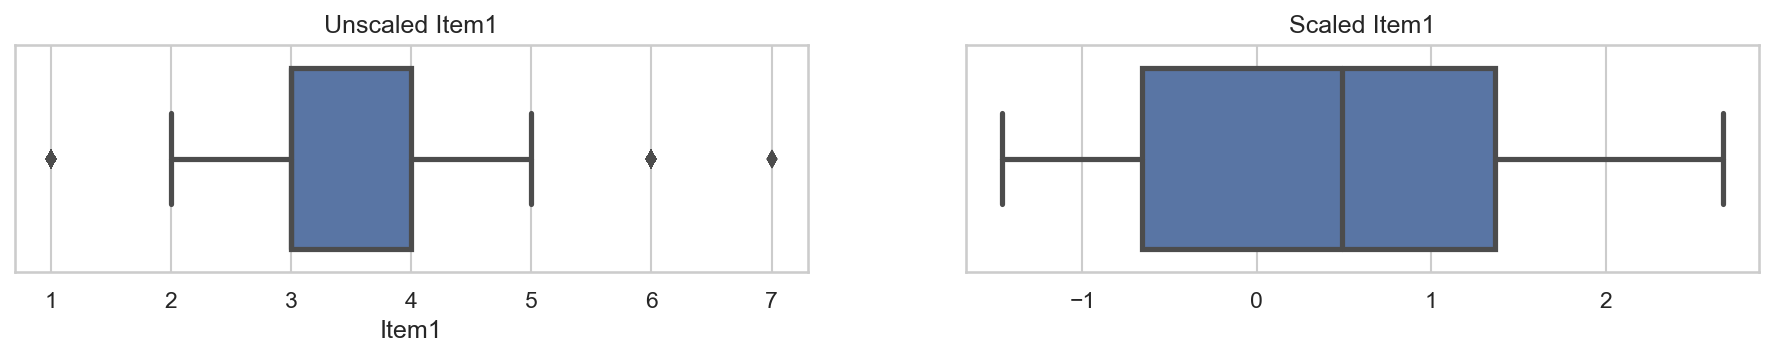

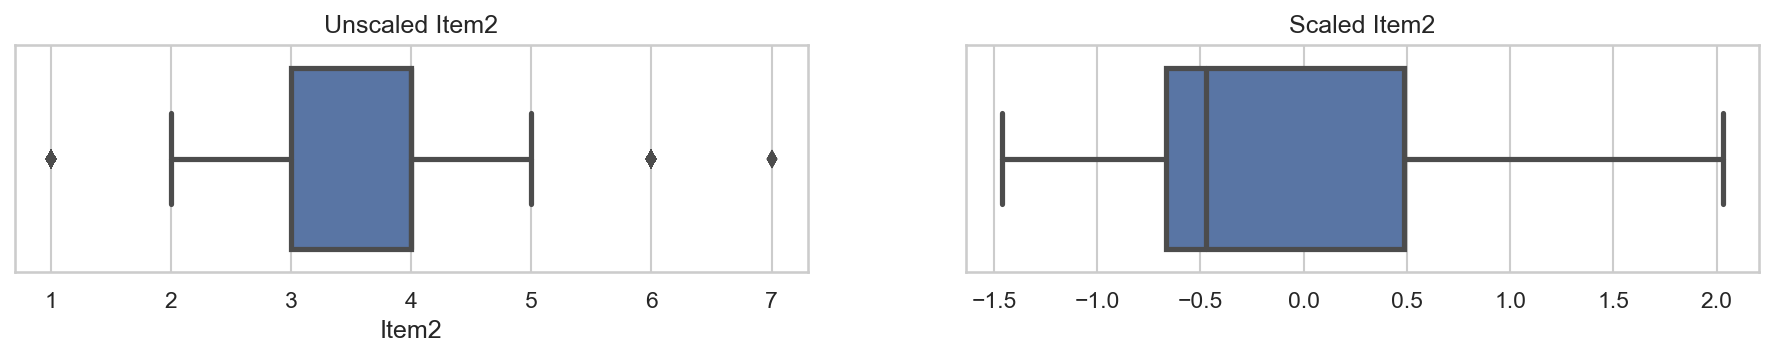

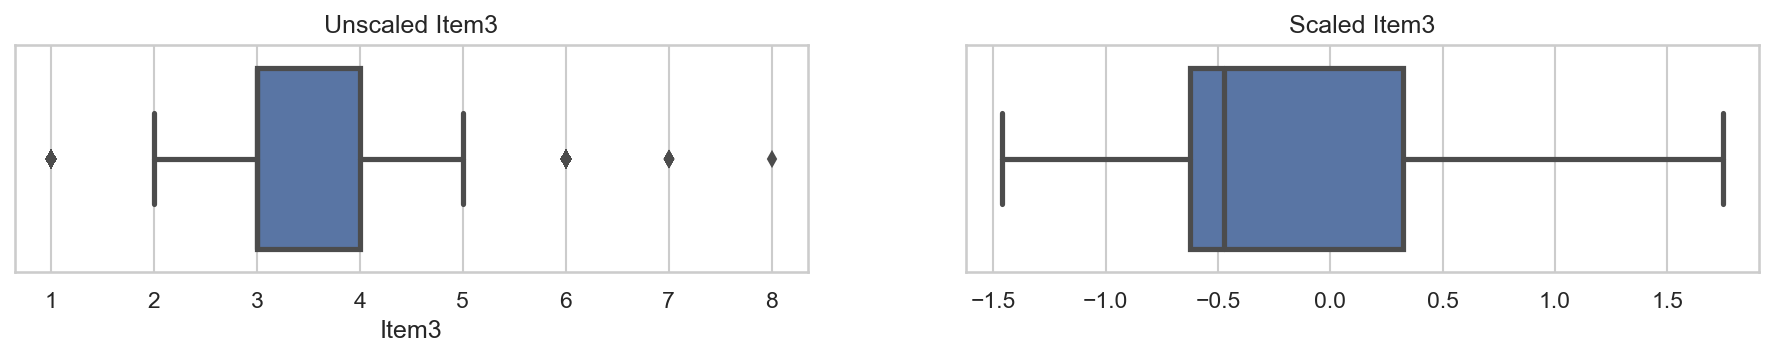

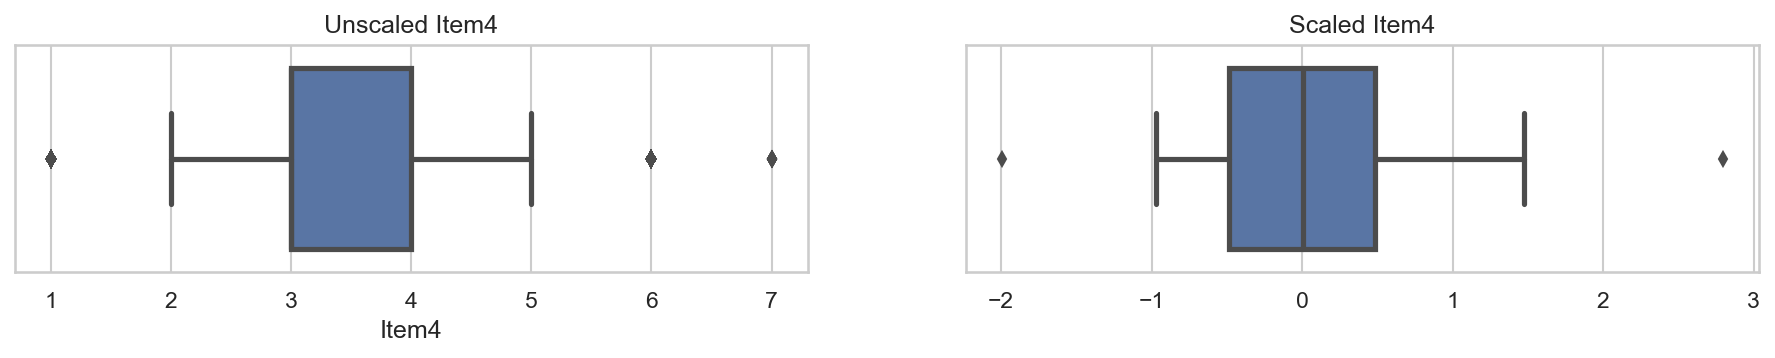

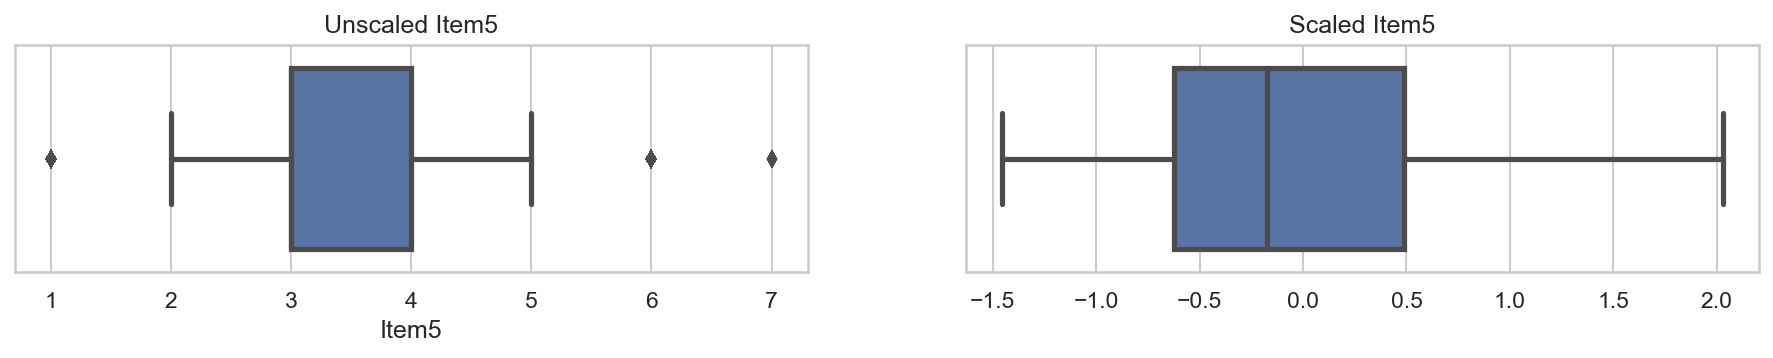

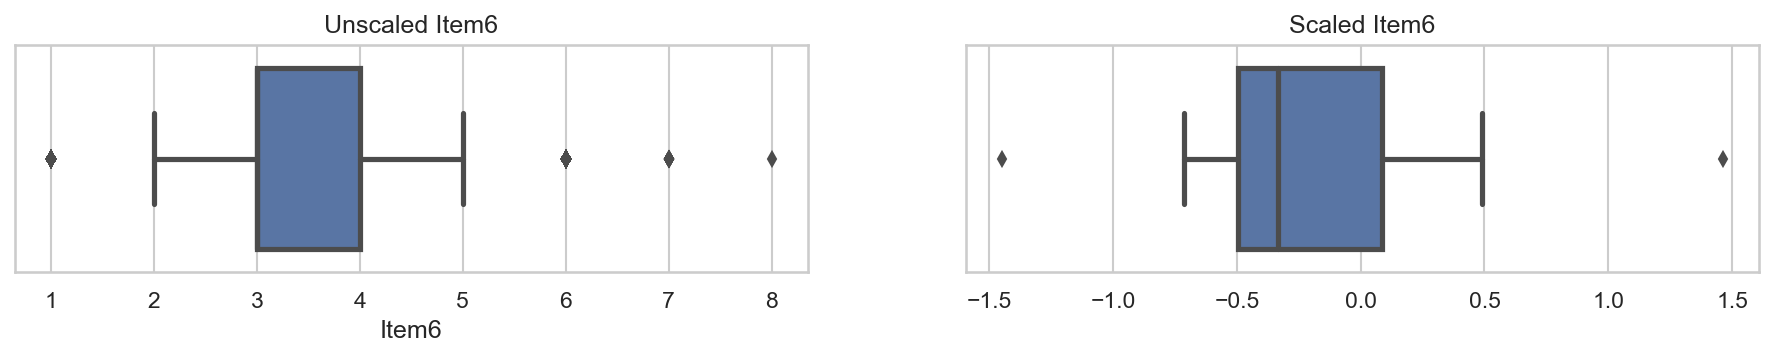

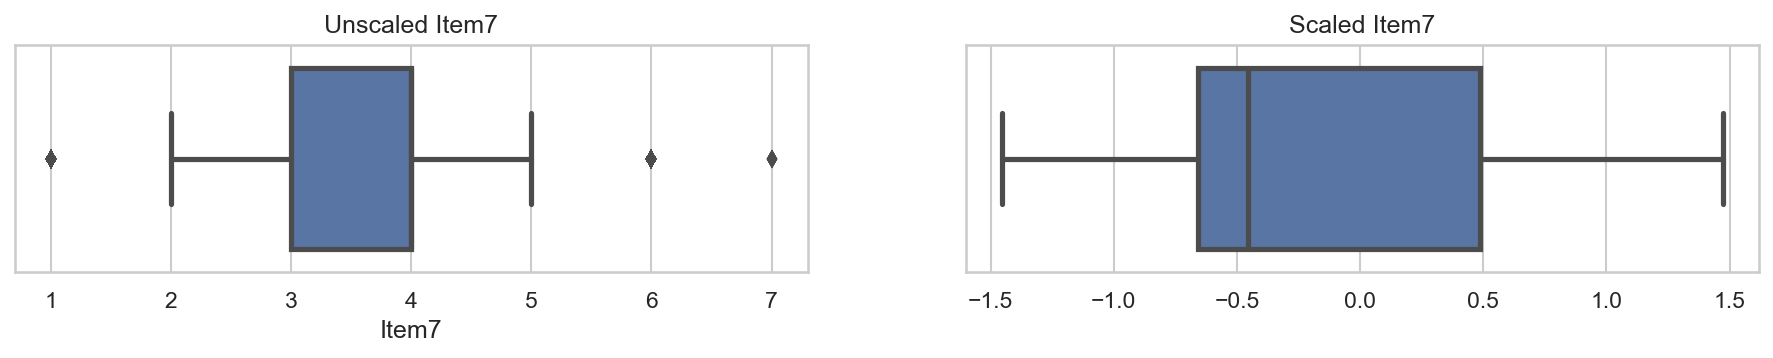

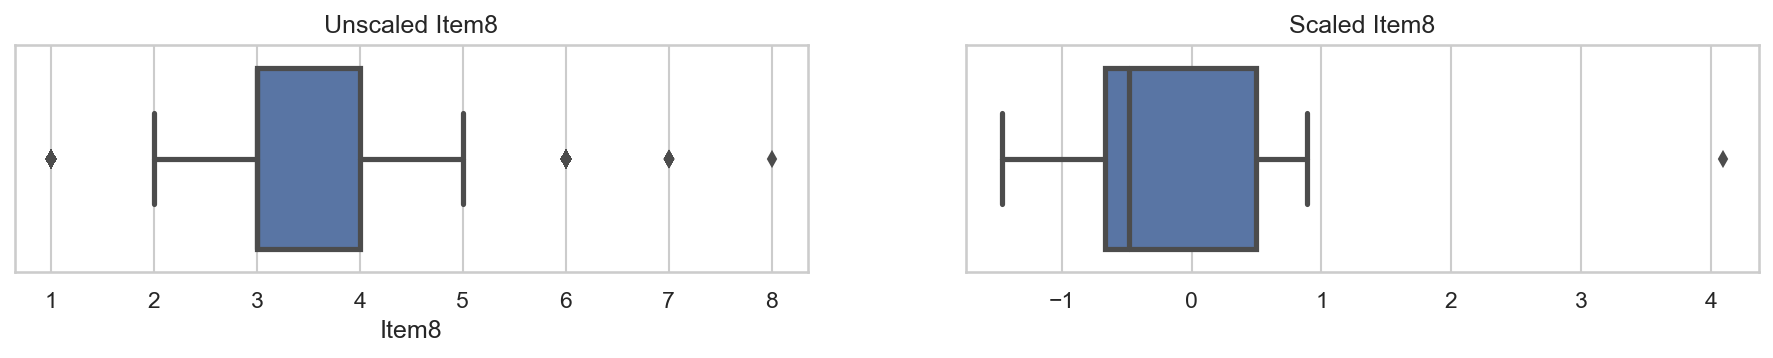

In [98]:
e = pipe.named_steps["scaler"].fit_transform(prep_df)


prep_df


for col, data in zip(prep_df.columns, e):
    fig, axs = plt.subplots(ncols=2, figsize=(15, 2))
    sns.boxplot(prep_df[col], ax=axs[0]).set(title=f"Unscaled {col}")
    sns.boxplot(data, ax=axs[1]).set(title=f"Scaled {col}")
    plt.show()


In [99]:
# the cumulative sums for the amount of variance explained by each of the selected components.
pca.explained_variance_ratio_.cumsum()

array([0.14041402, 0.23553153, 0.31347796, 0.37230523, 0.42245533,
       0.47219645, 0.52092659, 0.56911128, 0.61679958, 0.66407357,
       0.710988  , 0.7568861 , 0.80265277, 0.83978065, 0.87477926,
       0.90760281, 0.93577209, 0.9613706 , 0.98430506, 0.99974009,
       1.        ])

In [131]:
pd.DataFrame(
    data={"Explained Variance": pca.explained_variance_.T, "Explained Variance Ratio": pca.explained_variance_ratio_.T},
    index=prep_df.columns,
)

,Explained Variance,Explained Variance Ratio
Lat,2.95,0.14
Lng,2.00,0.10
Population,1.64,0.08
Children,1.24,0.06
Age,1.05,0.05
Income,1.04,0.05
Outage_sec_perweek,1.02,0.05
Email,1.01,0.05
Contacts,1.00,0.05
Yearly_equip_failure,0.99,0.05


In [101]:
# create dataframe from principal components
# correlation coefficients between the features and the principal components

# Principal axes in feature space, representing the directions of maximum variance in the data. Equivalently, the right singular vectors of the centered input data, parallel to its eigenvectors. The components are sorted by explained_variance_.
loadings = pd.DataFrame(
    data=pca.components_.T,
    columns=[f"PC{i}" for i in range(1, num_components +1)],
    index=prep_df.columns,
)

loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
Lat,-0.00,-0.02,-0.01,-0.71,-0.03,0.11,-0.10,-0.03,-0.01,-0.02,0.09,-0.01,0.06,0.10,0.66,0.09,-0.04,-0.01,0.02,-0.01,0.00
Lng,0.01,0.01,0.02,0.18,-0.34,-0.71,0.35,-0.09,-0.06,-0.07,-0.17,-0.09,-0.16,0.07,0.36,0.06,-0.04,0.02,0.00,-0.03,0.00
Population,-0.00,-0.00,0.02,0.65,0.17,0.31,-0.12,0.10,0.05,0.07,-0.03,0.03,0.11,0.17,0.61,0.09,-0.01,0.00,0.00,-0.01,-0.00
Children,0.00,0.02,0.03,-0.02,0.41,-0.49,-0.10,0.14,0.07,-0.08,0.19,0.18,0.69,-0.02,-0.00,-0.01,0.02,0.01,0.02,-0.00,-0.02
Age,0.01,0.00,-0.03,0.06,-0.43,0.26,0.42,-0.08,-0.18,0.10,0.35,-0.32,0.54,0.04,-0.04,-0.00,0.00,-0.01,0.01,0.01,0.02
Income,0.00,0.01,0.03,-0.06,0.19,-0.04,0.32,0.09,0.78,0.33,0.21,-0.24,-0.15,0.02,0.02,-0.08,0.01,-0.00,0.01,0.01,-0.00
Outage_sec_perweek,-0.02,0.00,-0.01,0.01,-0.26,-0.12,-0.46,0.58,0.09,-0.21,0.03,-0.55,-0.00,0.08,-0.05,0.01,0.01,0.01,0.02,0.01,0.00
Email,0.01,-0.02,-0.00,0.15,-0.09,-0.15,-0.35,-0.43,0.04,-0.14,0.75,0.01,-0.24,-0.06,0.04,-0.01,0.01,0.01,-0.02,0.00,0.00
Contacts,-0.01,0.00,-0.01,0.03,-0.44,0.14,0.02,0.02,0.52,-0.53,-0.08,0.45,0.16,-0.05,0.00,-0.04,0.00,-0.03,0.02,-0.00,-0.00
Yearly_equip_failure,-0.01,0.02,0.01,-0.01,0.15,0.05,0.42,0.58,-0.25,-0.25,0.42,0.27,-0.29,-0.01,0.04,0.01,0.01,-0.00,0.01,-0.02,-0.00


Based on the Kaiser Rule, we'll keep the first 9 PCs


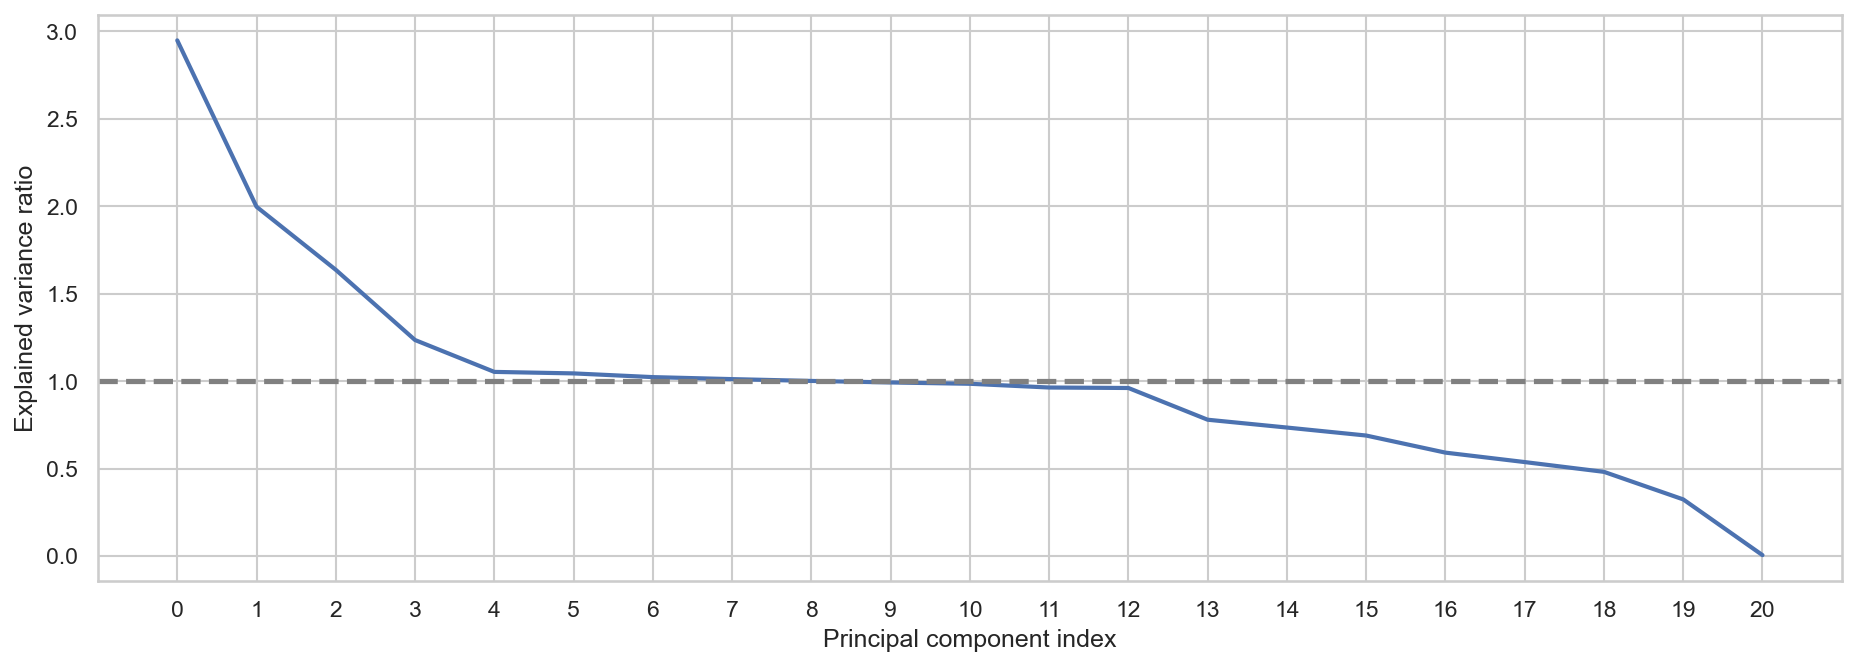

In [163]:
test_pca_normalized = StandardScaler().fit_transform(prep_df)

# The covariance matrix is a square matrix giving the covariance between each pair of elements of a given vector. The covariance matrix is symmetric and positive semi-definite and its main diagonal contains variances (i.e., the covariance of each element with itself).
# Dot product of two arrays. Specifically,
cov_matrix = np.dot(
    a=test_pca_normalized.T, b=test_pca_normalized / prep_df.shape[0]
)

cov_matrix = np.cov(m=test_pca_normalized.T)


# Eigenvalues are the variance explained by each principal component and are constrained to decrease monotonically from the first principal component to the last
eigenvalues = [
    np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector))
    for eigenvector in pca.components_
]

# Compute the eigenvalues and right eigenvectors of a square array.
# The eigenvalues are not necessarily ordered. 
eigenvalues, eigen_vecs = np.linalg.eig(cov_matrix)
eigenvalues = sorted(eigenvalues, reverse=True)

# display(np.around(eigenvalues, 3))
# display(sorted(np.around(eigenvalues2, 3), reverse=True))
# sorted()


plt.figure(figsize=(15, 5))

plt.plot(eigenvalues, linewidth=2)
plt.xticks(np.arange(0, prep_df.shape[1], 1))
plt.axhline(y=1, color="gray", linestyle="--")
plt.xlabel("Principal component index")
plt.ylabel("Explained variance ratio")

prep_df.shape[1]
cs = pca.explained_variance_ratio_.cumsum()
evs = np.array(eigenvalues)
num_pcs_to_use = len(evs[evs >= 1])

# The Kaiser rule: drop all components with eigenvalues < 1.0
print(f"Based on the Kaiser Rule, we'll keep the first {num_pcs_to_use} PCs")


In [173]:
prep_df.to_csv("./churn_data_prepared.csv", index=False)

# Part IV: Analysis
## D.  Perform PCA by doing the following:




### 1.  Determine the matrix of all the principal components.

In [174]:
# load the prepared data and reset the dataframe
df = pd.read_csv("./churn_data_prepared.csv")


In [224]:
pipe = Pipeline([("scaler", StandardScaler()), ("pca", PCA())])

test_pca_normalized = pipe.fit_transform(df)
pca = pipe.named_steps["pca"]
num_components = len(pca.components_)
PCS = [f"PC{i + 1}" for (i, _) in enumerate(pca.components_)]

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16',
 'PC17',
 'PC18',
 'PC19',
 'PC20',
 'PC21']

#### Loadings Table
- proportion of each data feature within a PC

In [239]:
# create dataframe from principal components
# correlation coefficients between the features and the principal components
loadings = pd.DataFrame(
    pca.components_.T,
    columns=PCS,
    index=prep_df.columns,
)

loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
Lat,-0.00,-0.02,-0.01,-0.71,-0.03,0.11,-0.10,-0.03,-0.01,-0.02,0.09,-0.01,0.06,0.10,0.66,0.09,-0.04,-0.01,0.02,-0.01,0.00
Lng,0.01,0.01,0.02,0.18,-0.34,-0.71,0.35,-0.09,-0.06,-0.07,-0.17,-0.09,-0.16,0.07,0.36,0.06,-0.04,0.02,0.00,-0.03,0.00
Population,-0.00,-0.00,0.02,0.65,0.17,0.31,-0.12,0.10,0.05,0.07,-0.03,0.03,0.11,0.17,0.61,0.09,-0.01,0.00,0.00,-0.01,-0.00
Children,0.00,0.02,0.03,-0.02,0.41,-0.49,-0.10,0.14,0.07,-0.08,0.19,0.18,0.69,-0.02,-0.00,-0.01,0.02,0.01,0.02,-0.00,-0.02
Age,0.01,0.00,-0.03,0.06,-0.43,0.26,0.42,-0.08,-0.18,0.10,0.35,-0.32,0.54,0.04,-0.04,-0.00,0.00,-0.01,0.01,0.01,0.02
Income,0.00,0.01,0.03,-0.06,0.19,-0.04,0.32,0.09,0.78,0.33,0.21,-0.24,-0.15,0.02,0.02,-0.08,0.01,-0.00,0.01,0.01,-0.00
Outage_sec_perweek,-0.02,0.00,-0.01,0.01,-0.26,-0.12,-0.46,0.58,0.09,-0.21,0.03,-0.55,-0.00,0.08,-0.05,0.01,0.01,0.01,0.02,0.01,0.00
Email,0.01,-0.02,-0.00,0.15,-0.09,-0.15,-0.35,-0.43,0.04,-0.14,0.75,0.01,-0.24,-0.06,0.04,-0.01,0.01,0.01,-0.02,0.00,0.00
Contacts,-0.01,0.00,-0.01,0.03,-0.44,0.14,0.02,0.02,0.52,-0.53,-0.08,0.45,0.16,-0.05,0.00,-0.04,0.00,-0.03,0.02,-0.00,-0.00
Yearly_equip_failure,-0.01,0.02,0.01,-0.01,0.15,0.05,0.42,0.58,-0.25,-0.25,0.42,0.27,-0.29,-0.01,0.04,0.01,0.01,-0.00,0.01,-0.02,-0.00


### 2.  Identify the total number of principal components using the elbow rule or the Kaiser criterion. Include a screenshot of the scree plot.
- Method 2: Calculate the proportion of variance explained (briefly explained below) for each feature, pick a threshold, and add features until you hit that threshold. (For example, if you want to explain 80% of the total variability possibly explained by your model, add features with the largest explained proportion of variance until your proportion of variance explained hits or exceeds 80%.)
- Method 3: This is closely related to Method 2. Calculate the proportion of variance explained for each feature, sort features by proportion of variance explained and plot the cumulative proportion of variance explained as you keep more features. (This plot is called a scree plot, shown below.) One can pick how many features to include by identifying the point where adding a new feature has a significant drop in variance explained relative to the previous feature, and choosing features up until that point. (I call this the “find the elbow” method, as looking at the “bend” or “elbow” in the scree plot determines where the biggest drop in proportion of variance explained occurs.)



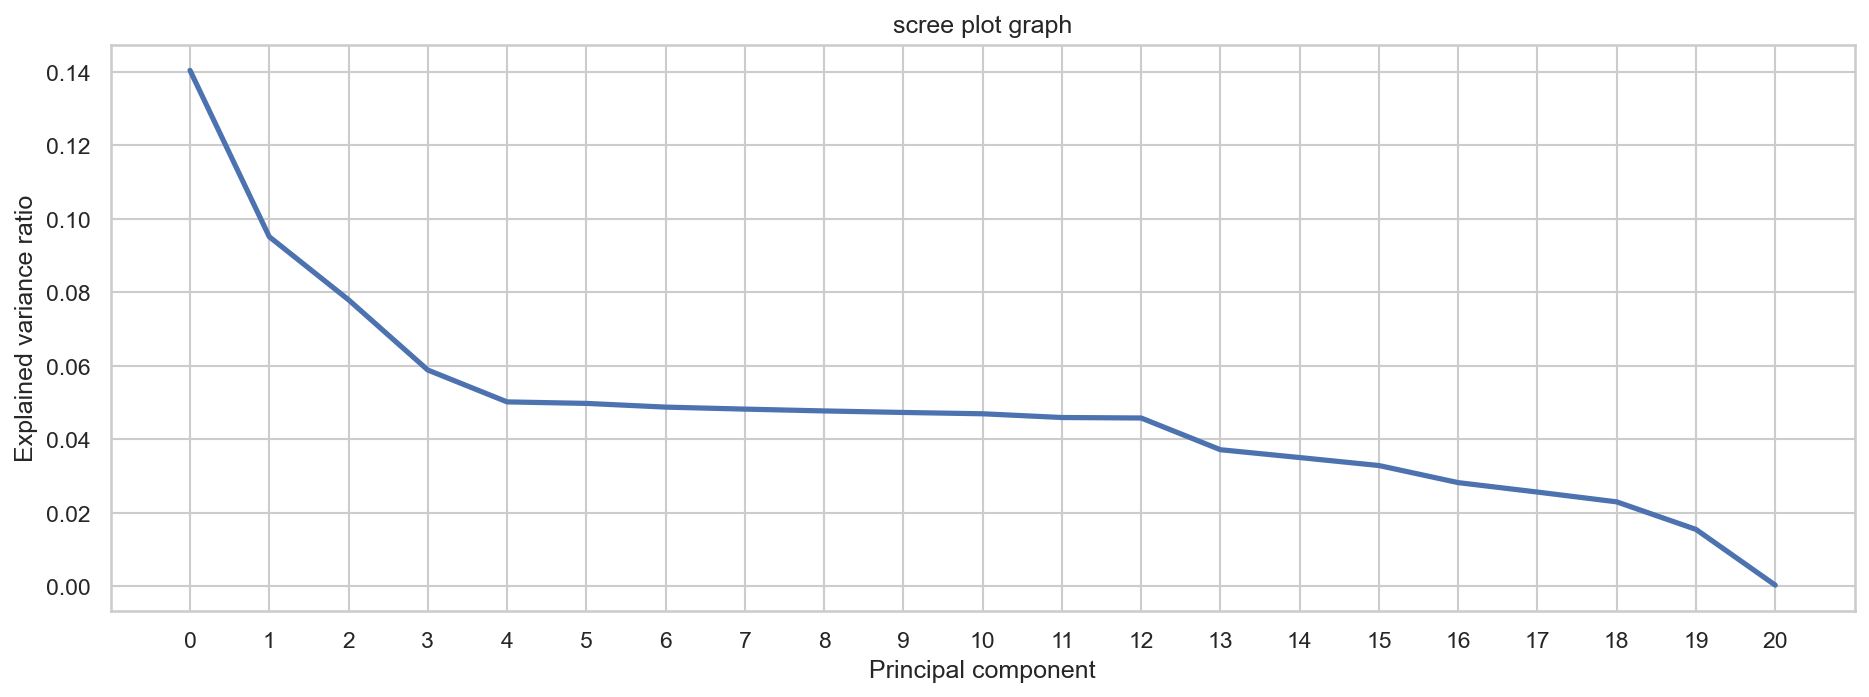

In [183]:
num_components = len(pca.components_)

fig, axs = plt.subplots(1, 1, figsize=(15, 5))
axs.set_title("scree plot graph")
sns.lineplot(data=var, ax=axs)

plt.xlabel("Principal component")
plt.ylabel("Explained variance ratio")
plt.xticks(np.arange(0, num_components, 1))

plt.show()

#### Covariance Matrix

In [192]:
cov_matrix = np.dot(
    test_pca_normalized.T, test_pca_normalized / df.shape[0]
)

display(pd.DataFrame(cov_matrix, columns=df.columns, index=df.columns))

,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
Lat,1.00,-0.10,-0.22,-0.00,-0.00,0.01,0.00,-0.03,-0.00,-0.01,-0.02,0.00,-0.02,0.01,0.01,-0.00,0.01,-0.00,-0.01,0.01,-0.02
Lng,-0.10,1.00,-0.05,0.01,0.01,-0.00,0.01,0.01,0.01,-0.01,0.00,0.01,0.00,0.02,0.00,0.01,-0.00,0.00,-0.01,0.00,0.00
Population,-0.22,-0.05,1.00,-0.01,0.01,-0.01,0.01,0.02,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.01,0.01,0.00,-0.01,0.01
Children,-0.00,0.01,-0.01,1.00,-0.03,0.01,0.00,0.00,-0.02,0.01,-0.01,-0.01,0.03,0.01,0.01,0.00,-0.02,-0.00,-0.00,0.00,-0.01
Age,-0.00,0.01,0.01,-0.03,1.00,-0.00,-0.01,0.00,0.02,0.01,0.02,0.01,-0.01,-0.01,0.01,-0.00,0.01,-0.01,0.01,0.01,0.02
Income,0.01,-0.00,-0.01,0.01,-0.00,1.00,-0.01,-0.01,0.00,0.01,0.00,-0.00,0.00,-0.00,0.01,-0.00,-0.02,0.01,0.00,0.02,0.00
Outage_sec_perweek,0.00,0.01,0.01,0.00,-0.01,-0.01,1.00,0.00,0.02,0.00,0.00,0.02,0.00,-0.02,-0.01,-0.02,-0.01,-0.00,-0.01,-0.02,0.01
Email,-0.03,0.01,0.02,0.00,0.00,-0.01,0.00,1.00,0.00,-0.02,-0.01,0.00,-0.01,0.00,0.00,0.01,0.00,-0.01,0.01,0.01,-0.01
Contacts,-0.00,0.01,0.00,-0.02,0.02,0.00,0.02,0.00,1.00,-0.01,0.00,0.00,0.00,-0.01,-0.00,-0.02,0.00,0.00,-0.00,0.00,-0.01
Yearly_equip_failure,-0.01,-0.01,-0.00,0.01,0.01,0.01,0.00,-0.02,-0.01,1.00,0.01,-0.01,0.01,0.01,-0.01,-0.01,-0.01,0.00,-0.00,-0.01,-0.01


#### Eigenvectors

In [243]:
# eigenvectors represent a linear combination or "recipe" of variables for a given PC
# the linear combinations are scale the side C to a length of 1 using the Pythagorean Theorem to get C from A and B
# the loading score are scaled to a length of 1 eigenvector va

# eigenvectors are the scaled 1 unit long vector that represents the linear combination of data attributes
# the proportion of each data attribute is referred to as the Loading Scores

# each loading score represents the amount of variance captured by a given data feature
pca.components_
eigenvector_df = pd.DataFrame(pca.components_, columns=df.columns, index=df.columns)
eigenvector_df

,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
Lat,-0.00,0.01,-0.00,0.00,0.01,0.00,-0.02,0.01,-0.01,-0.01,-0.02,0.00,-0.02,0.46,0.43,0.40,0.15,-0.18,0.41,0.36,0.31
Lng,-0.02,0.01,-0.00,0.02,0.00,0.01,0.00,-0.02,0.00,0.02,0.70,0.04,0.70,0.03,0.04,0.04,-0.04,0.06,-0.01,0.00,-0.01
Population,-0.01,0.02,0.02,0.03,-0.03,0.03,-0.01,-0.00,-0.01,0.01,-0.06,-0.01,-0.06,0.28,0.28,0.28,-0.57,0.59,-0.18,-0.18,-0.13
Children,-0.71,0.18,0.65,-0.02,0.06,-0.06,0.01,0.15,0.03,-0.01,-0.01,-0.00,-0.01,-0.01,-0.02,-0.00,-0.01,-0.01,0.01,-0.02,0.05
Age,-0.03,-0.34,0.17,0.41,-0.43,0.19,-0.26,-0.09,-0.44,0.15,0.01,-0.42,0.01,-0.02,-0.02,0.00,0.01,-0.03,0.01,0.02,-0.01
Income,0.11,-0.71,0.31,-0.49,0.26,-0.04,-0.12,-0.15,0.14,0.05,0.03,-0.11,-0.00,-0.00,0.02,0.00,-0.01,0.04,0.02,-0.01,0.02
Outage_sec_perweek,-0.10,0.35,-0.12,-0.10,0.42,0.32,-0.46,-0.35,0.02,0.42,0.01,-0.23,-0.02,-0.00,-0.02,-0.01,0.01,0.00,-0.00,0.03,-0.00
Email,-0.03,-0.09,0.10,0.14,-0.08,0.09,0.58,-0.43,0.02,0.58,-0.04,0.28,-0.01,0.02,0.01,-0.03,-0.01,-0.01,0.01,-0.03,0.07
Contacts,-0.01,-0.06,0.05,0.07,-0.18,0.78,0.09,0.04,0.52,-0.25,-0.00,-0.02,0.00,-0.02,0.00,-0.04,-0.03,-0.00,0.02,0.07,-0.00
Yearly_equip_failure,-0.02,-0.07,0.07,-0.08,0.10,0.33,-0.21,-0.14,-0.53,-0.25,-0.04,0.68,0.00,-0.01,-0.01,-0.01,-0.01,-0.00,-0.00,-0.01,0.03


#### Eigenvalues & Singular Values

In [241]:
# Eigenvalues represents the sum of the squared distances for the best fit line on a given PC

# Eigenvalues are the variance explained by each principal component and are constrained to decrease monotonically from the first principal component to the last
eigenvalues = np.array([
    np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector))
    for eigenvector in pca.components_
])

eigenvalues_df = pd.DataFrame(eigenvalues, index=PCS).T
eigenvalues_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
0,2.95,2.00,1.64,1.24,1.05,1.04,1.02,1.01,1.00,0.99,0.99,0.96,0.96,0.78,0.73,0.69,0.59,0.54,0.48,0.32,0.01


In [242]:
np.sqrt(eigenvalues_df) # singular value

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
0,1.72,1.41,1.28,1.11,1.03,1.02,1.01,1.01,1.00,1.00,0.99,0.98,0.98,0.88,0.86,0.83,0.77,0.73,0.69,0.57,0.07


#### Scree Plot & Kaiser Rule

Based on the Kaiser Rule, we'll keep the first 9 PCs


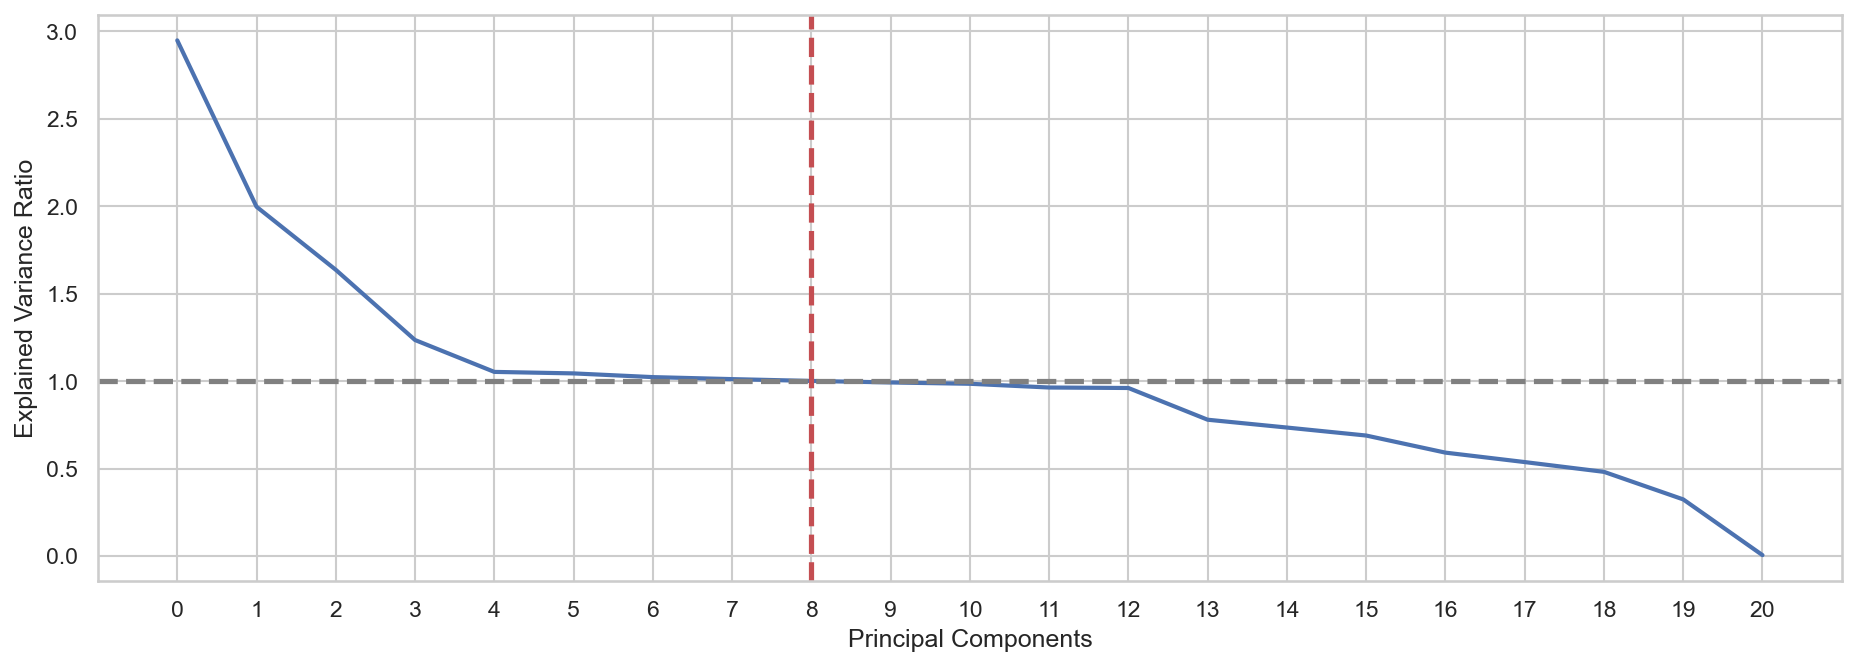

In [316]:
plt.figure(figsize=(15, 5))

plt.plot(eigenvalues, linewidth=2)
plt.xticks(np.arange(0, len(PCS), 1))
plt.axhline(y=1, color="gray", linestyle="--")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")

evs = np.array(eigenvalues)
num_pcs_to_use = len(evs[evs >= 1])

plt.axvline(num_pcs_to_use - 1, linestyle="--", color="r")

# The Kaiser rule: drop all components with eigenvalues < 1.0
print(f"Based on the Kaiser Rule, we'll keep the first {num_pcs_to_use} PCs")


### 3.  Identify the variance of each of the principal components identified in part D2.


In [231]:
# Eigenvectors
Eigen

In [ ]:
# Eigenvalues
eigenvalues_df

### 4.  Identify the total variance captured by the principal components identified in part D2.

In [293]:


# eigenvalues_df.iloc[:, :num_pcs_to_use].sum(axis=1

# list(pca.explained_variance_ratio_.cumsum())[num_pcs_to_use]
# [:num_pcs_to_use]

# Percentage of variance explained by each of the selected components.

explained_var_df = pd.DataFrame(pca.explained_variance_ratio_.cumsum(), index=PCS).T
explained_var_df


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
0,0.14,0.24,0.31,0.37,0.42,0.47,0.52,0.57,0.62,0.66,0.71,0.76,0.80,0.84,0.87,0.91,0.94,0.96,0.98,1.00,1.00


### 5.  Summarize the results of your data analysis.

# Part V: Attachments

## E.  Record the web sources used to acquire data or segments of third-party code to support the analysis. Ensure the web sources are reliable.
- https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html#sphx-glr-auto-examples-decomposition-plot-kernel-pca-py



### F.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.
- https://www.youtube.com/watch?v=qtaqvPAeEJY
- https://youtu.be/FgakZw6K1QQ
- https://builtin.com/data-science/step-step-explanation-principal-component-analysis
- https://stats.stackexchange.com/a/32700
- https://analyticsindiamag.com/guide-to-image-reconstruction-using-principal-component-analysis/
- https://academic.oup.com/heapol/article/21/6/459/612115?login=false
 